In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Transient Diffusion (Boundary Value Problem - BVP)

$\frac{∂C}{∂t}=D \nabla^2C$

$\frac{∂C}{∂t}(z,t)=D\frac{∂^2C}{∂z^2}(z,t)$ (1D)

At this point two questions arise:\
    1) How does the concentration change as time progresses?\
    2) How does the concentration change as we move along the rod?
    
Note that the way any one of these values changes depends on the other values.


$\frac{∂C}{∂t}|_{i,j} = \frac{C_{i,j+1}-C_{i,j}}{\Delta t}$

$\frac{∂^2C}{∂t^2}|_{i,j} = \frac{C_{i,j+1}-2C_{i,j}+C_{i,j-1}}{\Delta t^2}$

**Data**

Length of wall (L) = 1 m\
Initial condition C$_0$(z) = 0.0\
Left boundary condition C(0, t) = 0.1\
Right boundary condition ∂C/∂z(L, t) = 0.0

In [2]:
N = 20 # number of points to discretize

# spatial discretization
L = 1.0 # length of wall
z = np.linspace(0, L, N) # position along the rod
dz = L / (N - 1) # discretization spacing

# temporal discretization
tfinal = 50.0
tspan = np.linspace(0, tfinal, N)

def pde_func(t, C, D):
    dCdt = np.zeros(z.shape)
    dCdt[0] = 0 # constant at boundary condition
    
    
    # now for the internal nodes
    for i in range(1, N-1):
        
        dCdt[i] = D * (C[i + 1] - 2*C[i] + C[i - 1]) / dz**2
      
    dCdt[-1] = dCdt[-2] # ∂C/∂x(L,t)=0
    return dCdt

# left boundary condition
C_init = 0.1*np.ones(z.shape) # C(0, t) = 0.1

# initial value
C_init[0] = 0.0

# arguments of pde
D = 0.02
args = (D,)

sol = solve_ivp(pde_func, (0, tspan[-1]), C_init, t_eval = tspan, args = args)

In [3]:
pd.DataFrame(sol.y.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.0,0.012899,0.025467,0.037375,0.048391,0.058280,0.066971,0.074362,0.080537,0.085512,0.089468,0.092485,0.094771,0.096418,0.097605,0.098404,0.098938,0.099250,0.099398,0.099398
2,0.0,0.009127,0.018163,0.026906,0.035389,0.043327,0.050879,0.057707,0.064073,0.069626,0.074694,0.078944,0.082722,0.085740,0.088315,0.090224,0.091709,0.092628,0.093111,0.093111
3,0.0,0.007424,0.014786,0.021999,0.029028,0.035774,0.042230,0.048291,0.053976,0.059184,0.063954,0.068195,0.071957,0.075166,0.077871,0.080016,0.081642,0.082716,0.083258,0.083258
4,0.0,0.006329,0.012571,0.018788,0.024748,0.030654,0.036156,0.041568,0.046458,0.051212,0.055364,0.059326,0.062643,0.065705,0.068119,0.070202,0.071667,0.072721,0.073212,0.073212
5,0.0,0.005470,0.010883,0.016247,0.021443,0.026541,0.031371,0.036050,0.040376,0.044500,0.048204,0.051652,0.054636,0.057310,0.059496,0.061320,0.062654,0.063579,0.064027,0.064027
6,0.0,0.004752,0.009473,0.014119,0.018671,0.023075,0.027326,0.031362,0.035188,0.038741,0.042033,0.045002,0.047664,0.049966,0.051923,0.053494,0.054691,0.055487,0.055890,0.055890
7,0.0,0.004139,0.008256,0.012298,0.016273,0.020103,0.023820,0.027328,0.030679,0.033766,0.036653,0.039232,0.041571,0.043570,0.045292,0.046656,0.047709,0.048401,0.048756,0.048756
8,0.0,0.003607,0.007200,0.010717,0.014193,0.017520,0.020775,0.023819,0.026759,0.029434,0.031970,0.034203,0.036260,0.037990,0.039505,0.040685,0.041613,0.042211,0.042523,0.042523
9,0.0,0.003150,0.006269,0.009359,0.012358,0.015298,0.018092,0.020796,0.023306,0.025695,0.027851,0.029854,0.031595,0.033152,0.034432,0.035496,0.036278,0.036819,0.037082,0.037082


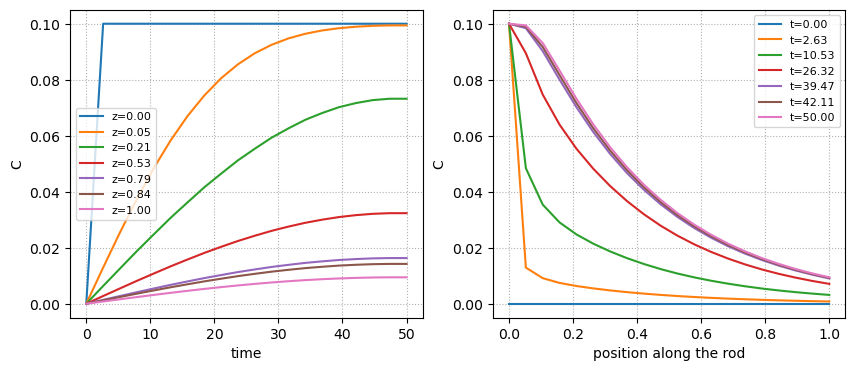

In [4]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,4))

for j in [0, 1, 4, 10, 15, 16, -1]:
    ax[0].plot(sol.t, sol.y[:, j], label='z={0:1.2f}'.format(z[j])) # ∂C/dt - all rows from each column
    ax[1].plot(z, sol.y[j, :], label='t={0:1.2f}'.format(tspan[j])) # ∂C/dz - all columns from each row

    
ax[0].set_xlabel("time")
ax[0].set_ylabel("C")
ax[0].legend(fontsize = 8)
ax[0].grid(linestyle = ":")

ax[1].set_xlabel("position along the rod")
ax[1].set_ylabel("C")
ax[1].legend(fontsize = 8)
ax[1].grid(linestyle = ":")

<Figure size 640x480 with 0 Axes>

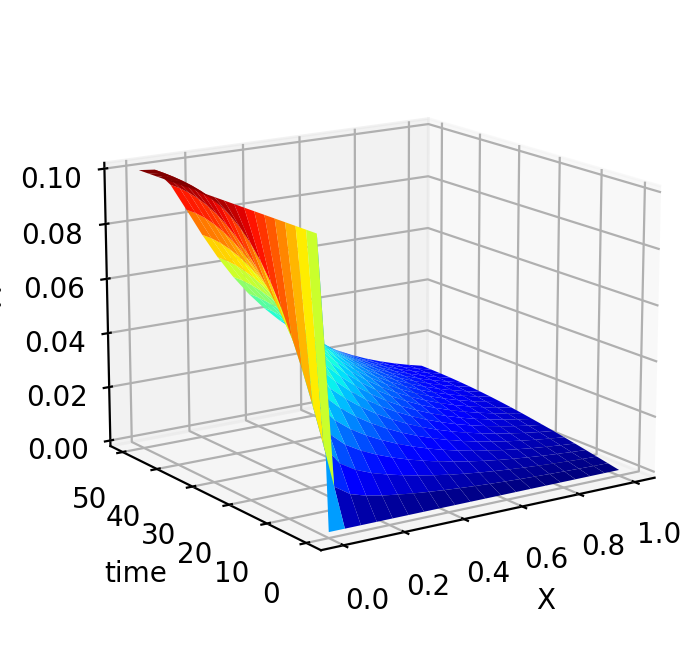

In [5]:
plt.subplots_adjust(top=0.89, right=0.77)

# Make a 3d figure
fig = plt.figure(figsize=(6,4), dpi=200)
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(z, tspan)
ax.plot_surface(SX, ST, sol.y, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('C')
ax.view_init(elev=15, azim=-124) # adjust view so it is easy to see